# importing library


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np

In [16]:
df = pd.read_csv("data.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [17]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [18]:
df.shape

(4600, 18)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [20]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [21]:
df.drop(["date", "street", "city", "statezip", "country"],axis = 1, inplace=True)

In [22]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


In [28]:
x = df.drop(["price"], axis = 1)
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979
4596,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009
4597,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
4598,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


In [29]:
y = df["price"]

In [30]:
y

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64

In [37]:
x.shape

(4600, 12)

In [38]:
y.shape

(4600,)

##  Split the Data into Training and Testing Sets

In [41]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

print("Training Data Shape:", xtrain.shape)
print("Testing Data Shape:", xtest.shape)

Training Data Shape: (3680, 12)
Testing Data Shape: (920, 12)


## Train a Random Forest Regressor

In [45]:
# Create the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(xtrain, ytrain)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Make Predictions

In [48]:
y_pred = model.predict(xtest)
print(y_pred)

[ 412349.07666667  350639.82550324 1132995.54        509775.55107142
  317385.75238096  529381.93        439188.8325      329514.3
  301976.9707143   585285.47        702755.37589745  360570.82834759
 1022232.21        824669.5         277686.47285714  836444.42
  580082.2078125   601284.1162947   894726.93333333  800276.51
  618790.02        699340.67181822  564759.88        361338.55190473
  315958.57        298641.5         642837.52       1141126.16
  426246.08571429  936244.6        1667030.          467201.00925926
 1030654.93        469232.61000001  322025.79833332  441849.75
  827784.47142857 1094471.19        241295.66666664  502843.52
  482628.9431169   245680.92857142  441121.33333333  364624.85683983
  434180.25        402007.84857143  344774.87964285  587212.3
  913189.          585629.31835165 1391921.44        451883.36
  386248.38779222  527725.54666662  212402.65333333  387773.10293656
  944100.01        676776.7         777292.31        297304.33571428
  642717.407142

## Evaluate Model Performance

In [52]:
r2 = metrics.r2_score(ytest, y_pred)
mae = metrics.mean_absolute_error(ytest, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(ytest, y_pred))

print("R² Score:", r2)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

R² Score: 0.027524232809177818
Mean Absolute Error: 208109.706986305
Root Mean Squared Error: 995879.4364745229


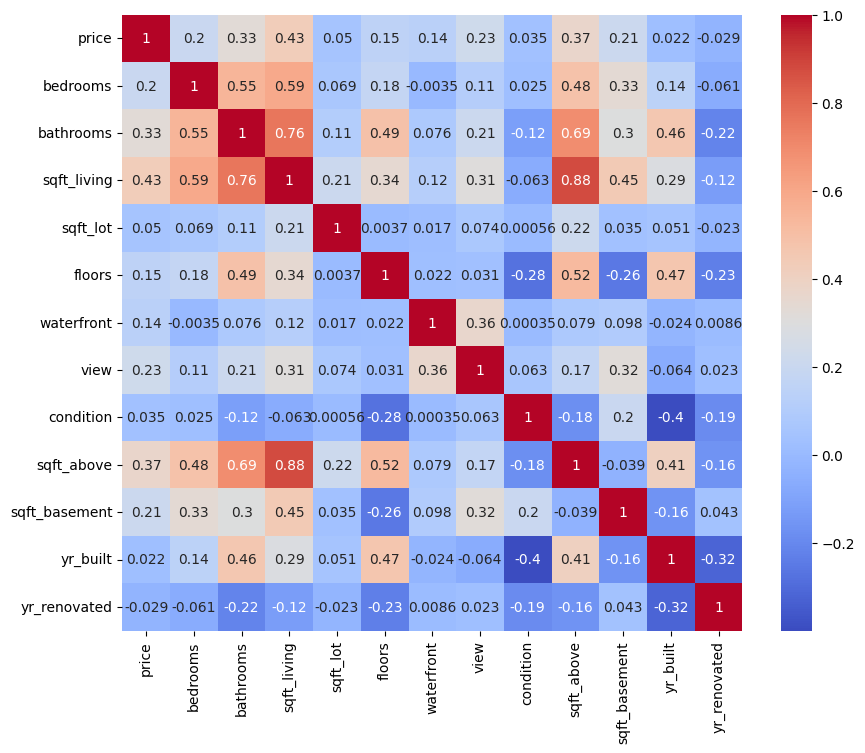

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()
